In [1]:
%matplotlib inline

import networkx as nx
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def powerlaw(D, lamb, p0):
    x = np.arange(1,D)
    x = np.asarray(x, dtype=float)
    x = x**(-lamb)
    x = x/x.sum(axis=0)*(1-p0)
    x = np.insert(x, 0, p0, axis=0)
    return x

In [241]:
N = 50 #number of nodes

In [242]:
D = N-1 #maximum degree
lamb = 2


degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

In [ ]:
p = 0.1
G = nx.erdos_renyi_graph(N, p)

In [209]:
M=10
G = nx.random_partition_graph([int(N/M)]*M,1,0.05)

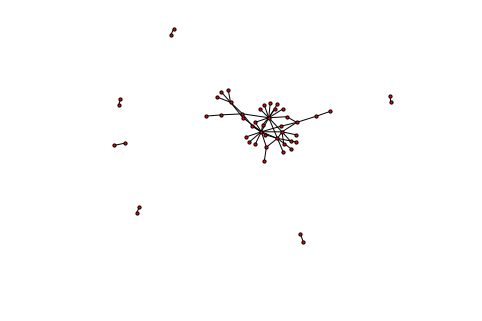

In [244]:
pos= nx.spring_layout(G)
nx.draw(G, pos=pos, node_size =10)

In [255]:
def simulate(G, p_remove, p_add, trialtime, thresh, infected):
    H = G.copy()
    #count_remove = 0
    #count_add = 0
    for e in G.edges():
        test = np.random.uniform(low=0.0, high=1.0, size=None)
        if test < p_remove:
            H.remove_edge(e[0], e[1])
            #count_remove = count_remove + 1

    for n in range(N-1):
        for n2 in range(n+1, N):
            test = np.random.uniform(low=0.0, high=1.0, size=None)
            if test < p_add:
                H.add_edge(n,n2)
                #if not G.has_edge(n, n2):
                    #count_add = count_add + 1
    
    results = np.zeros([trialtime])
    redun_connections= np.ones([trialtime])
    timetaken = np.zeros([trialtime])
    
    for t in range(trialtime):
        aware = set([])
        results[t] = len(infected)
        for node in infected:
            aware.update({n for n in H.neighbors(node)})
        temp = aware - infected
        temp_infect = copy.deepcopy(infected)

        for node in temp:
            neighH = {n for n in H.neighbors(node)}
            neighG = {n for n in G.neighbors(node)}
            timetaken[t] = max(len(neighH), timetaken[t])
            redun_connections[t] = len(neighH - neighH.intersection(neighG))
            neighset = neighG

            if len(temp_infect.intersection(neighset)) >= thresh*len(neighset) :
                infected.update({node})
                
    #time = np.cumsum(timetaken)
    #time = np.insert(time[range(trialtime-1)], 0, 0)
    
    return results, timetaken, redun_connections
    

In [254]:
def simulate_swap(G, n_swap, trialtime, thresh, infected):
    H = G.copy()
    nx.double_edge_swap(G, n_swap, max_tries=n_swap**2);
    results = np.zeros([trialtime])
    redun_connections= np.ones([trialtime])
    timetaken = np.zeros([trialtime])
    
    for t in range(trialtime):
        aware = set([])
        results[t] = len(infected)
        for node in infected:
            aware.update({n for n in H.neighbors(node)})
        temp = aware - infected
        temp_infect = copy.deepcopy(infected)

        for node in temp:
            neighH = {n for n in H.neighbors(node)}
            neighG = {n for n in G.neighbors(node)}
            timetaken[t] = max(len(neighH), timetaken[t])
            redun_connections[t] = len(neighH - neighH.intersection(neighG))
            neighset = neighG

            if len(temp_infect.intersection(neighset)) >= thresh*len(neighset) :
                infected.update({node})
                
    #time = np.cumsum(timetaken)
    #time = np.insert(time[range(trialtime-1)], 0, 0)
    
    return results, timetaken, redun_connections
    

In [274]:
trialtime = 10
initial_infection = 0.4
thresh = 0.5
#p_remove = 0
p_add = 0
finesse = 10
trialnumber = 100
window = range(50)
results = np.zeros([finesse,trialtime])
times = np.zeros([finesse, trialtime])
max_nswap = N

for T in range(trialnumber):
    infected = set(np.random.choice([n for n in G.nodes()], int(N*initial_infection)))
    #print(infected)
    window = range(10)
    '''
    R = simulate(G, p_remove, p_add, trialtime, thresh, copy.deepcopy(infected))
    plt.plot(R[1][window], R[0][window], 'b+')


    '''

    for i in range(finesse):
     
        p_remove = 1
        p_add = float((i)/(finesse))
        #print(p_remove)
        R = simulate(G, p_remove, p_add, trialtime, thresh, copy.deepcopy(infected))
        '''
        n_swap = i*N
        R = simulate_swap(G, n_swap, trialtime, thresh, copy.deepcopy(infected))
           '''
        results[i]= R[0] + results[i]
        times[i] = R[1] + times[i]

        #plt.plot(out[1][window], out[0][window])

IndexError: index 10 is out of bounds for axis 0 with size 10

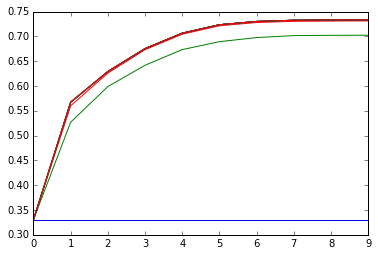

In [279]:
w= range(10)

for i in range(19):
    timer = np.cumsum(times[i][w])/trialnumber
    timer = np.insert(timer[range(1,10)], 0, 0)
    #plt.plot(timer, results[i][w]/N/trialnumber)
    plt.plot(results[i][w]/N/trialnumber, '-')
    #if results[i][trialtime-1] <N:
        #print(i)
#plt.plot(times[2], results[2], 'r+')
#infected

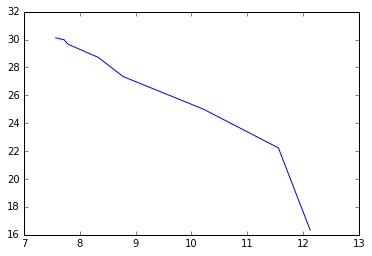

In [266]:
window = range(15)
plt.plot(times[0][range(10)]/trialnumber, results[i][range(10)]/trialnumber )
#plt.plot(times[finesse-1][window]/trialnumber, results[finesse-1][window]/trialnumber/n)

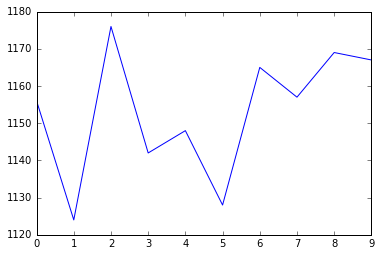

In [269]:
flip = times.T
plt.plot(flip[1])

In [253]:
flip

array([[ 246.,  246.,  196.,  214.,  232.,  221.,  224.,  216.,  195.,
         220.],
       [ 154.,  173.,  169.,  169.,  172.,  166.,  190.,  190.,  185.,
         173.],
       [ 107.,  124.,  122.,  129.,  126.,  121.,  129.,  127.,  128.,
         129.],
       [  46.,  104.,  112.,  107.,  104.,   98.,  108.,  104.,  104.,
         102.],
       [   9.,  100.,  104.,  103.,  101.,   96.,  107.,  102.,  105.,
          95.],
       [   1.,  101.,  102.,  100.,  100.,   95.,  105.,   96.,  101.,
          95.],
       [   0.,  101.,  102.,  100.,  100.,   95.,  105.,   95.,  101.,
          95.],
       [   0.,  101.,  102.,  100.,  100.,   95.,  105.,   95.,  101.,
          95.],
       [   0.,  101.,  102.,  100.,  100.,   95.,  105.,   95.,  101.,
          95.],
       [   0.,  101.,  102.,  100.,  100.,   95.,  105.,   95.,  101.,
          95.]])

In [ ]:
nx.draw(H, pos=pos, node_size=10)
print(nx.is_connected(H))

In [ ]:
print(count_add)
print(count_remove)

In [ ]:
len(G.nodes())

In [ ]:
aware = set([])
thresh = 0.4
initial_infection = 0.5
infected = set(np.random.choice([n for n in G.nodes()], int(N*initial_infection)))
trialtime = N


In [ ]:
len(infected)

In [ ]:
results = np.zeros([trialtime])
redun_connections= np.ones([trialtime])
error_connections = np.zeros([trialtime])

for t in range(trialtime):
    results[t] = len(infected)
    for node in infected:
        aware.update({n for n in H.neighbors(node)})
    temp = aware - infected
    temp_infect = copy.deepcopy(infected)
    
    for node in temp:
        neighH = {n for n in H.neighbors(node)}
        neighG = {n for n in G.neighbors(node)}
        redun_connections[t] = max(redun_connections[t], len(neighH - neighH.intersection(neighG)))
        neighset = neighG
        
        if len(temp_infect.intersection(neighset)) >= thresh*len(neighset) :
            infected.update({node})
          

In [ ]:
time = np.cumsum(redun_connections)
np.insert(time, 0, 0)

In [ ]:
window = range(1,trialtime)
plt.plot(time[window],results[window]/N, 'b-')
plt.ylim(0,1)

In [ ]:
0.24*50